## Coursera Capstone - REPORT CONTENT
1-Introduction Section : ⁃ Discussion of the business problem and the interested audience in this project.\
2-Data Section:
⁃ Description of the data that will be used to solve the problem and the sources.\
3-Methodology section ⁃ Discussion and description of exploratory data analysis carried out, any inferential statistical testing performed, and if any machine learnings were used establishing the strategy and purposes.\
4-Results section ⁃ Discussion of the results.\
5-Discussion section ⁃ Elaboration and discussion on any observations noted and any recommendations suggested based on the results.\
6-Conclusion section ⁃ Report Conclusion.

## Introduction Section :
the problem that I will solve the get the best  location open a restaurant


## Data Section
 the dataset from foursquare API  the location open a restaurant,and  analyisis in maadi,cairo,egypt from services 
  
 

In [99]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation


!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize


! pip install folium==0.5.0
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


In [100]:
CLIENT_ID = 'BD1TC52EYFGHXZRYM0CWBYYHWFD1WWNN11FXDZG31V3MSZ45' # your Foursquare ID
CLIENT_SECRET = 'HZ0YJOFOEVU5UJIFXMNBPY2DMJ4AW3OEUPBDGRBQJ4N0J3WH' # your Foursquare Secret
ACCESS_TOKEN = '' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: BD1TC52EYFGHXZRYM0CWBYYHWFD1WWNN11FXDZG31V3MSZ45
CLIENT_SECRET:HZ0YJOFOEVU5UJIFXMNBPY2DMJ4AW3OEUPBDGRBQJ4N0J3WH


In [166]:
address = ' new york,usa'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

40.7127281 -74.0060152


In [167]:
search_query = 'food'
radius = 500
print(search_query + ' .... OK!')

food .... OK!


In [168]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=BD1TC52EYFGHXZRYM0CWBYYHWFD1WWNN11FXDZG31V3MSZ45&client_secret=HZ0YJOFOEVU5UJIFXMNBPY2DMJ4AW3OEUPBDGRBQJ4N0J3WH&ll=40.7127281,-74.0060152&oauth_token=&v=20180604&query=food&radius=500&limit=30'

In [169]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '610aae4c7deed174ee90b63d'},
 'response': {'venues': [{'id': '49bc3b0af964a52020541fe3',
    'name': 'Whole Foods Market',
    'location': {'address': '270 Greenwich St',
     'crossStreet': 'at Warren St',
     'lat': 40.715579155420606,
     'lng': -74.01136823958119,
     'labeledLatLngs': [{'label': 'display',
       'lat': 40.715579155420606,
       'lng': -74.01136823958119}],
     'distance': 552,
     'postalCode': '10007',
     'cc': 'US',
     'neighborhood': 'Tribeca',
     'city': 'New York',
     'state': 'NY',
     'country': 'United States',
     'formattedAddress': ['270 Greenwich St (at Warren St)',
      'New York, NY 10007',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d118951735',
      'name': 'Grocery Store',
      'pluralName': 'Grocery Stores',
      'shortName': 'Grocery Store',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_grocery_',
       'suffix': '.png'},
      'primary'

In [170]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

<ipython-input-170-5acf500bf9ad>:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  dataframe = json_normalize(venues)


,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.neighborhood,location.city,location.state,location.country,location.formattedAddress
0,49bc3b0af964a52020541fe3,Whole Foods Market,"[{'id': '4bf58dd8d48988d118951735', 'name': 'G...",v-1628089932,False,270 Greenwich St,at Warren St,40.715579,-74.011368,"[{'label': 'display', 'lat': 40.71557915542060...",552,10007,US,Tribeca,New York,NY,United States,"[270 Greenwich St (at Warren St), New York, NY..."
1,4b969958f964a5209ed734e3,Halal Fast Food (cart),"[{'id': '4bf58dd8d48988d1cb941735', 'name': 'F...",v-1628089932,False,Greenwich and Murray,Barclay Street,40.715147,-74.011504,"[{'label': 'display', 'lat': 40.71514746067547...",535,10007,US,NaN,New York,NY,United States,"[Greenwich and Murray (Barclay Street), New Yo..."
2,4d90a7553bfef04defe0c786,Breakfast Food Cart,"[{'id': '4bf58dd8d48988d1cb941735', 'name': 'F...",v-1628089932,False,Water Street,Pine Street,40.707063,-74.005083,"[{'label': 'display', 'lat': 40.70706288490862...",635,10038,US,NaN,New York,NY,United States,"[Water Street (Pine Street), New York, NY 1003..."
3,4c1102f3ce57c928ecbb82d2,Halal Food Cart,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",v-1628089932,False,723,Btwn w 23rd & 24th Street,40.712778,-74.005943,"[{'label': 'display', 'lat': 40.71277753095443...",8,10010,US,NaN,New York,NY,United States,"[723 (Btwn w 23rd & 24th Street), New York, NY..."
4,4dee21fc18385379de543dd6,Plaza Food Court,"[{'id': '4bf58dd8d48988d120951735', 'name': 'F...",v-1628089932,False,1 Centre St,NaN,40.713627,-74.003236,"[{'label': 'display', 'lat': 40.71362706685846...",254,10007,US,NaN,New York,NY,United States,"[1 Centre St, New York, NY 10007, United States]"


In [171]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,neighborhood,city,state,country,formattedAddress,id
0,Whole Foods Market,Grocery Store,270 Greenwich St,at Warren St,40.715579,-74.011368,"[{'label': 'display', 'lat': 40.71557915542060...",552,10007,US,Tribeca,New York,NY,United States,"[270 Greenwich St (at Warren St), New York, NY...",49bc3b0af964a52020541fe3
1,Halal Fast Food (cart),Food Truck,Greenwich and Murray,Barclay Street,40.715147,-74.011504,"[{'label': 'display', 'lat': 40.71514746067547...",535,10007,US,NaN,New York,NY,United States,"[Greenwich and Murray (Barclay Street), New Yo...",4b969958f964a5209ed734e3
2,Breakfast Food Cart,Food Truck,Water Street,Pine Street,40.707063,-74.005083,"[{'label': 'display', 'lat': 40.70706288490862...",635,10038,US,NaN,New York,NY,United States,"[Water Street (Pine Street), New York, NY 1003...",4d90a7553bfef04defe0c786
3,Halal Food Cart,Indian Restaurant,723,Btwn w 23rd & 24th Street,40.712778,-74.005943,"[{'label': 'display', 'lat': 40.71277753095443...",8,10010,US,NaN,New York,NY,United States,"[723 (Btwn w 23rd & 24th Street), New York, NY...",4c1102f3ce57c928ecbb82d2
4,Plaza Food Court,Food Court,1 Centre St,NaN,40.713627,-74.003236,"[{'label': 'display', 'lat': 40.71362706685846...",254,10007,US,NaN,New York,NY,United States,"[1 Centre St, New York, NY 10007, United States]",4dee21fc18385379de543dd6
5,Sarwari Halal Food Truck,Food Truck,8 Spruce St,NaN,40.712020,-74.005657,"[{'label': 'display', 'lat': 40.71202, 'lng': ...",84,10038,US,NaN,New York,NY,United States,"[8 Spruce St, New York, NY 10038, United States]",4d7bbe1b6152b60c8c7d8426
6,Food Truck 777,Food Truck,Gold,Spruce,40.710352,-74.005737,"[{'label': 'display', 'lat': 40.71035197937242...",265,10038,US,NaN,New York,NY,United States,"[Gold (Spruce), New York, NY 10038, United Sta...",4e494d9e62e148603b973ab3
7,TriNet Food Truck,Food Truck,NaN,NaN,40.711476,-74.006678,"[{'label': 'display', 'lat': 40.711476, 'lng':...",150,NaN,US,NaN,New York,NY,United States,"[New York, NY, United States]",52275da211d2f9ed4d00974f
8,Happy Food Factory,Food Truck,NaN,NaN,40.714269,-74.005973,"[{'label': 'display', 'lat': 40.7142691, 'lng'...",171,NaN,US,NaN,New York,NY,United States,"[New York, NY, United States]",4be5b3aa910020a11958d314
9,Asian Diet Food - Broadway,Asian Restaurant,235 Broadway,NaN,40.712559,-74.008240,"[{'label': 'display', 'lat': 40.71255874633789...",188,10279,US,NaN,New York,NY,United States,"[235 Broadway, New York, NY 10279, United States]",4e4e6d3fbd4101d0d7a9e7ff


In [172]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

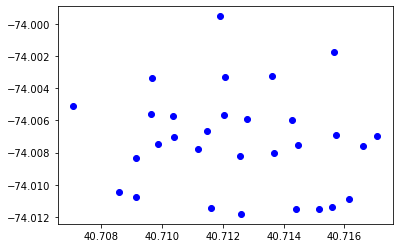

In [173]:
import matplotlib.pyplot as plt
plt.scatter(dataframe_filtered['lat'],dataframe_filtered['lng'],  color='blue')

In [211]:
X= np.asarray(dataframe_filtered[['distance']])
y = np.asarray(dataframe_filtered[['lat','lng']])
y[0:5]

array([[ 40.71557916, -74.01136824],
       [ 40.71514746, -74.01150428],
       [ 40.70706288, -74.00508303],
       [ 40.71277753, -74.0059427 ],
       [ 40.71362707, -74.00323578]])

## Methodology section 
connect to api and get data then clean data analyisis 

## Results section 

## Discussion section 

## Conclusion section